<a href="https://colab.research.google.com/github/sbogde/scikit-regressions-and-confessions/blob/main/2382432_Task2_Algo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
# Importing the usual suspects
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [24]:
# Check if running in Google Colab
# Dynamically set the file path based on the execution environment
if 'google.colab' in str(get_ipython()):
    from google.colab import drive, data_table
    drive.mount('/content/drive')
    file_path = '/content/drive/My Drive/Colab Notebooks/heart.csv'
    data_table.enable_dataframe_formatter()
else:
    file_path = './heart.csv'  # Local path

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
# Let's take the dataset's pulse
dataset = pd.read_csv(file_path)

In [26]:
# The first 5 rows of our patient data.
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
# How big is the  dataset?
print("The shape of the dataset is : ", dataset.shape)

The shape of the dataset is :  (303, 14)


In [28]:
# Check for missing values
dataset.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


In [29]:
# Defining our features (X) by slicing the dataset.
# We’re taking all rows and all columns except the last one (output).
X = dataset.iloc[ : , :-1]
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [30]:
# Defining our target variable (Y), which is the 'output' column.
# Luckily, it's already encoded as 0 and 1. Perfect for classification!
# According to the dataset docs: 0 means less chance of heart attack, 1 means more chance.
Y = dataset.iloc[ : , -1]
Y

,output
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


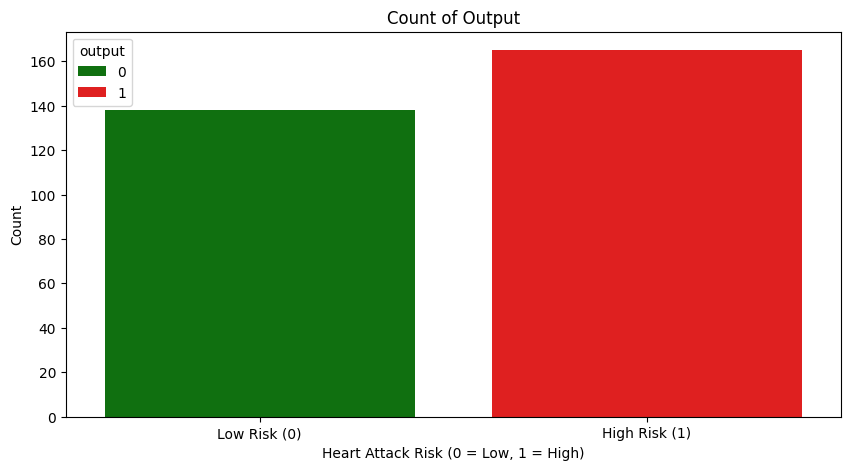

In [31]:
# Visualising heart attack risk levels
# Green = Good (Low Risk), Red = Bad (High Risk)
plt.figure(figsize=(10, 5))
# sb.countplot(data=dataset, x='output', palette=['green', 'red'])
sb.countplot(data=dataset, x='output', hue='output', palette=['green', 'red'], dodge=False)

plt.title("Count of Output")
plt.xlabel("Heart Attack Risk (0 = Low, 1 = High)")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Low Risk (0)", "High Risk (1)"])
plt.show()

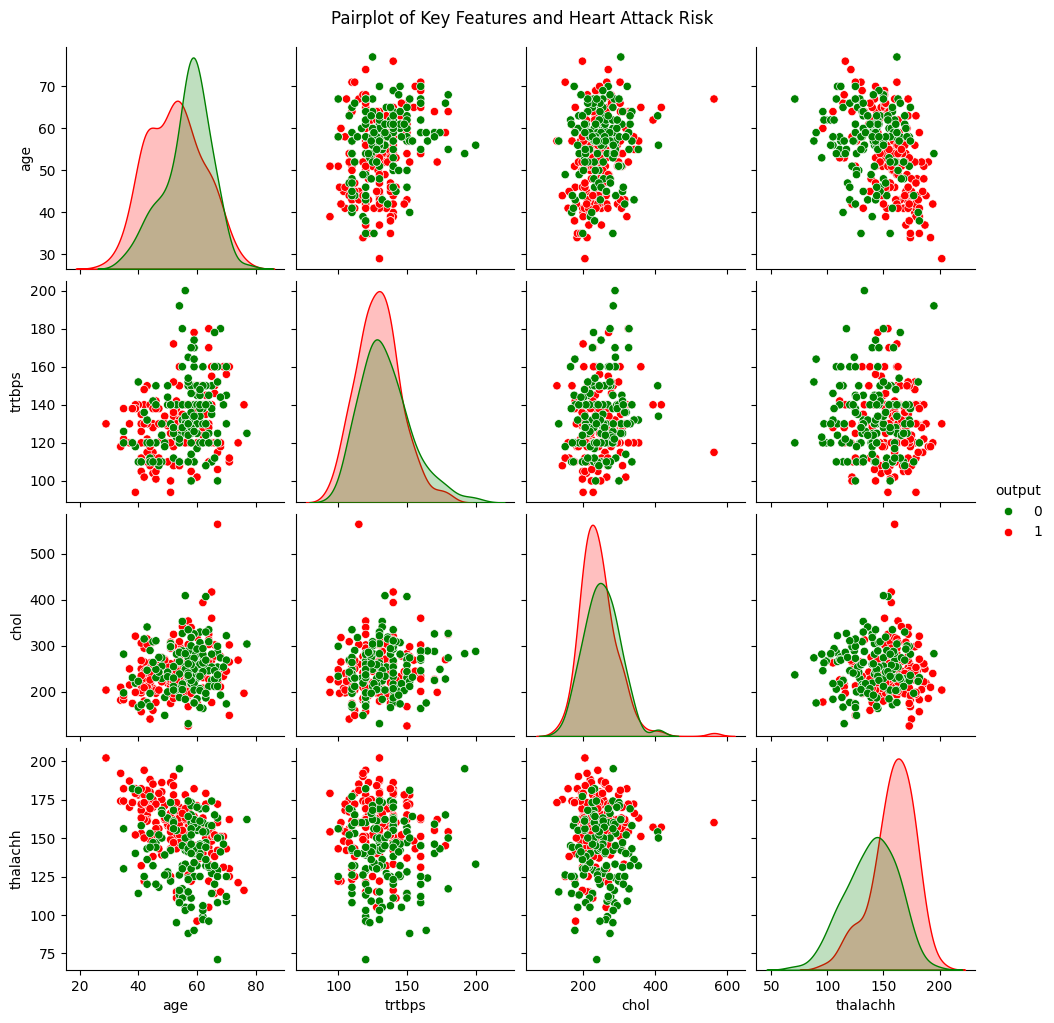

In [32]:
# sb.pairplot(dataset, hue='output')
# Pairplot: quick dive into feature relationships.
# Let's tone it down a bit by limiting to key features for clarity.

pairplot_features = ['age', 'trtbps', 'chol', 'thalachh', 'output']
sb.pairplot(dataset[pairplot_features], hue='output', palette=['green', 'red'])
plt.suptitle("Pairplot of Key Features and Heart Attack Risk", y=1.02)
plt.show()


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 1: Find the best random state
best_accuracy = 0
best_random_state = 0

# Loop through random states to find the best split
for random_state in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=random_state)
    # classifier = DecisionTreeClassifier(max_depth=2)  # Use a fixed depth for now
    classifier = DecisionTreeClassifier(max_depth=3)  # Use a fixed depth for now
    # classifier = DecisionTreeClassifier(max_depth=4)  # Use a fixed depth for now
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_random_state = random_state

print(f"Best Random State: {best_random_state} with Accuracy: {best_accuracy}")
# Best Random State: 5 with Accuracy: 0.8688524590163934

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=best_random_state)


Best Random State: 5 with Accuracy: 0.8688524590163934


In [34]:
from sklearn.model_selection import GridSearchCV

# Step 2: Use the best random state found above
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=best_random_state)

# Define the parameter grid for max_depth
param_grid = {
    'max_depth': range(1, 15)
}

# Run GridSearchCV to find the best max_depth
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=best_random_state),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)

# Print the results
print(f"Best max_depth: {grid_search.best_params_['max_depth']}")
print(f"Test Accuracy: {test_accuracy}")


Best max_depth: 4
Test Accuracy: 0.8360655737704918


In [35]:
# classifier = DecisionTreeClassifier()
# classifier = DecisionTreeClassifier(max_depth=1)
# classifier = DecisionTreeClassifier(max_depth=2)
classifier = DecisionTreeClassifier(max_depth=3)
# classifier = DecisionTreeClassifier(max_depth=4)
# classifier = DecisionTreeClassifier(max_depth=5)
# classifier = DecisionTreeClassifier(max_depth=6)
# classifier = DecisionTreeClassifier(max_depth=7)
# classifier = DecisionTreeClassifier(max_depth=8)
# classifier = DecisionTreeClassifier(max_depth=9)
# classifier = DecisionTreeClassifier(max_depth=10)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [36]:
# predicting
predictions = classifier.predict(X_test)

In [37]:
# Here are the predictions: 1s for high risk, 0s for low risk
# predictions

In [38]:
# Let's compare the model’s predictions with the actual outcomes from the test set
# y_test

In [39]:
# Import confusion_matrix and classification_report
from sklearn.metrics import confusion_matrix, classification_report

In [40]:
# Generate the classification report to see precision, recall, and F1 scores
# Precision: How many of the predicted positives are truly positive
# Recall: How many of the actual positives were correctly identified
# F1-Score: A harmonic mean of Precision and Recall
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        30
           1       0.83      0.94      0.88        31

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



In [41]:
# Printing the confusion matrix to evaluate model predictions.
# Think of it as a "who-got-it-right" table:
# - CM11: True Negatives  (TN) - Correctly identified low-risk patients.
# - CM12: False Positives (FP) - Predicted high-risk, but they're low-risk.
# - CM21: False Negatives (FN) - Predicted low-risk, but they're actually high-risk (*Critical!).
# - CM22: True Positives  (TP) - Correctly identified high-risk patients.
# NOTE: False negatives (FN) are more concerning for a heart condition dataset,
#        as missing a high-risk patient could have serious consequences.

print(confusion_matrix(y_test, predictions))

[[24  6]
 [ 2 29]]


In [42]:
# Normalize the confusion matrix to get proportions
conf_matrix_norm = confusion_matrix(y_test, predictions, normalize='true')
print("\nNormalised Confusion Matrix:")
print(conf_matrix_norm)


Normalised Confusion Matrix:
[[0.8        0.2       ]
 [0.06451613 0.93548387]]


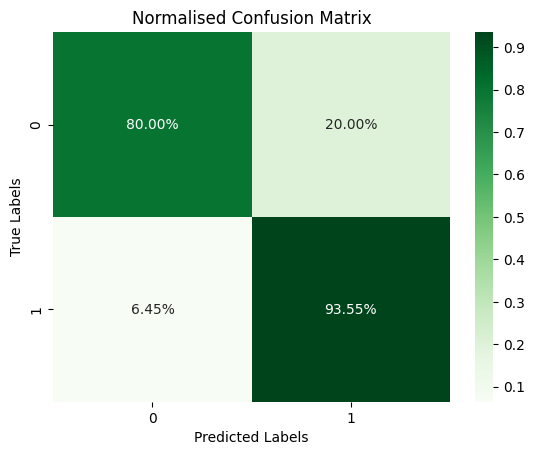

In [43]:
# Visualise the normalised confusion matrix as a heatmap
# This shows proportions instead of raw numbers, making it easier to interpret

sb.heatmap(conf_matrix_norm, annot=True, fmt='.2%', cmap='Greens')
plt.title("Normalised Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

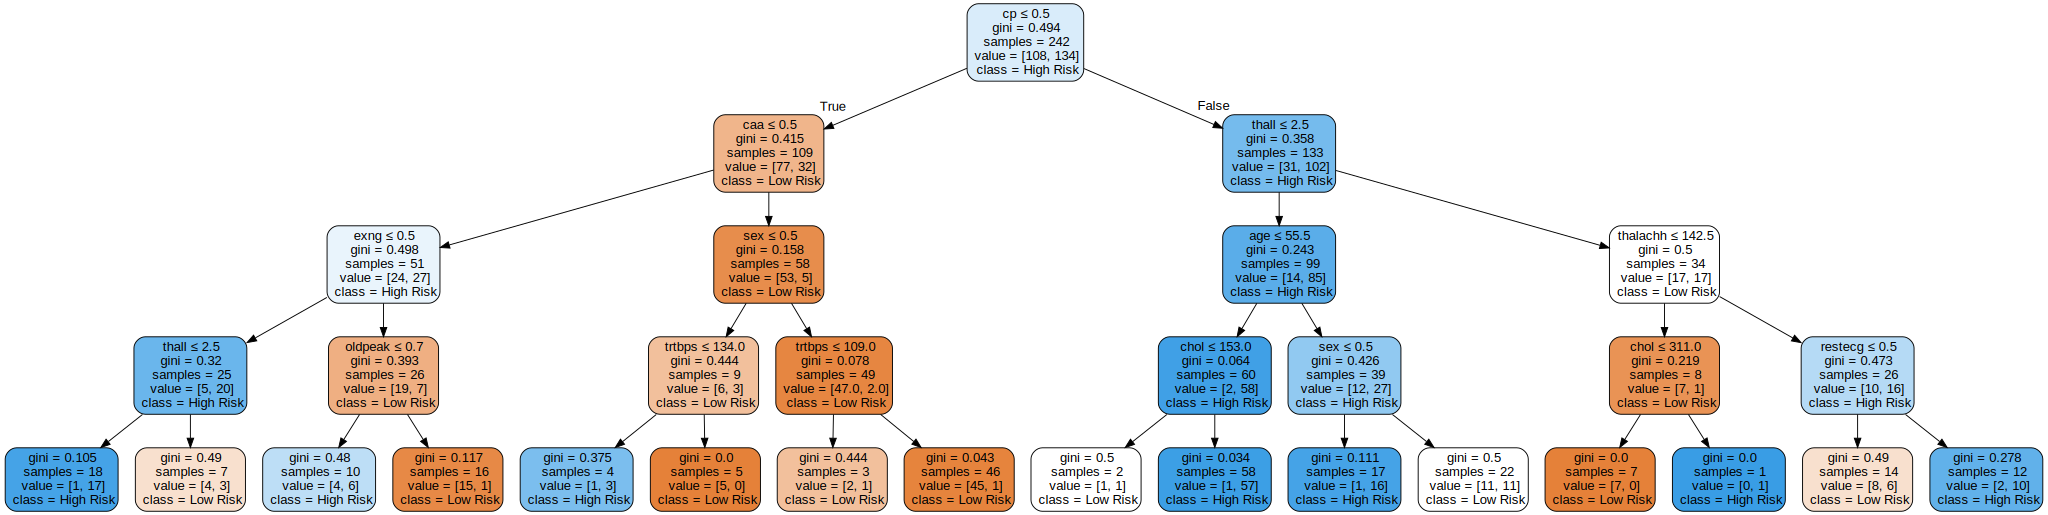

In [44]:
import graphviz
from sklearn import tree

# Feature names and target names for the visualisation
feature_col_tree = X.columns.tolist()
target = ["Low Risk", "High Risk"]     #

# DOT data for visualising the tree
dot_data = tree.export_graphviz(
    best_model,                         # Use the best model from GridSearchCV
    out_file=None,                      # No file output, just data
    feature_names=feature_col_tree,     # Feature names for clarity
    class_names=target,                 # Class names (0 = Low Risk, 1 = High Risk)
    filled=True,                        # Pretty colours!
    rounded=True,                       # Rounded nodes for better aesthetics
    special_characters=True             # To handle any special characters
)

# Render the graph using graphviz
graph = graphviz.Source(dot_data, format="png")
graph.render("decision_tree")           # Save the tree as PNG (optional)
graph                                   # Display the tree in Jupyter
